In [0]:
# Automatically reload external libraries that change
%reload_ext autoreload
%autoreload 2
# If a matplotlib plot command is issued, display the results in the notebook
%matplotlib inline

In [18]:
# Upload data
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [19]:
!tar xvzf track_shower_images.tar.gz

Images/
Images/Hits/
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_0_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_100_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_101_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_102_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_103_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_104_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_105_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_106_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_107_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_108_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_109_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_10_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_110_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_111_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_112_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_113_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_114_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_115_0.png
Images/Hits/Image_DUNEFD_MC1

In [0]:
# Reduce to just 100 images
#!rm -f Images/Truth/Image*_[0-9][0-9][0-9]_0.png
#!rm -f Images/Hits/Image*_[0-9][0-9][0-9]_0.png

In [22]:
# Upload supporting python modules
from google.colab import files
files.upload()
from data import SegmentationBunch
from transforms import Rescale, ToTensor
from unet import UNet
import img_util as iu

Saving data.py to data (1).py
Saving img_util.py to img_util (1).py
Saving transforms.py to transforms (1).py
Saving unet.py to unet (1).py


In [0]:
from data import open_image
img = open_image("Images/Truth/Image_DUNEFD_MC11_CaloHitListW_0_0.png")

In [24]:
img.size

(512, 208)

In [0]:
from torchvision import transforms
from torch.autograd import Variable
import torch
import torch.optim as opt
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [0]:
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
#bunch = SegmentationBunch("Images", "Hits", "Truth", batch_size=64, valid_pct = 0.2,
#    transform=transforms.Compose([Rescale((512, 208)), ToTensor()]))
bunch = SegmentationBunch("Images", "Hits", "Truth", batch_size=48, valid_pct = 0.2,
    transform=transforms.Compose([ToTensor(True)]))

In [0]:
void_code = 0

def accuracy(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [0]:
# Create the network, loss function and optimizer
n_classes = 3
model = UNet(1, n_classes = n_classes, n_filters = 16, y_range = (0, n_classes))
#print(model)
loss_fn = nn.CrossEntropyLoss(torch.tensor([0.,0.5,0.5]))
#loss_fn = nn.modules.loss.BCELoss()
optim = opt.Adam(model.parameters())

torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([16, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([4, 3, 208, 512])
Epoch 1 : loss 0.5922549594851101 acc 0.7323186923475826   val_loss 0.931227195262909 val_acc 0.6600217938423156:
torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([48, 3, 208, 512])
torch.Size([48, 3

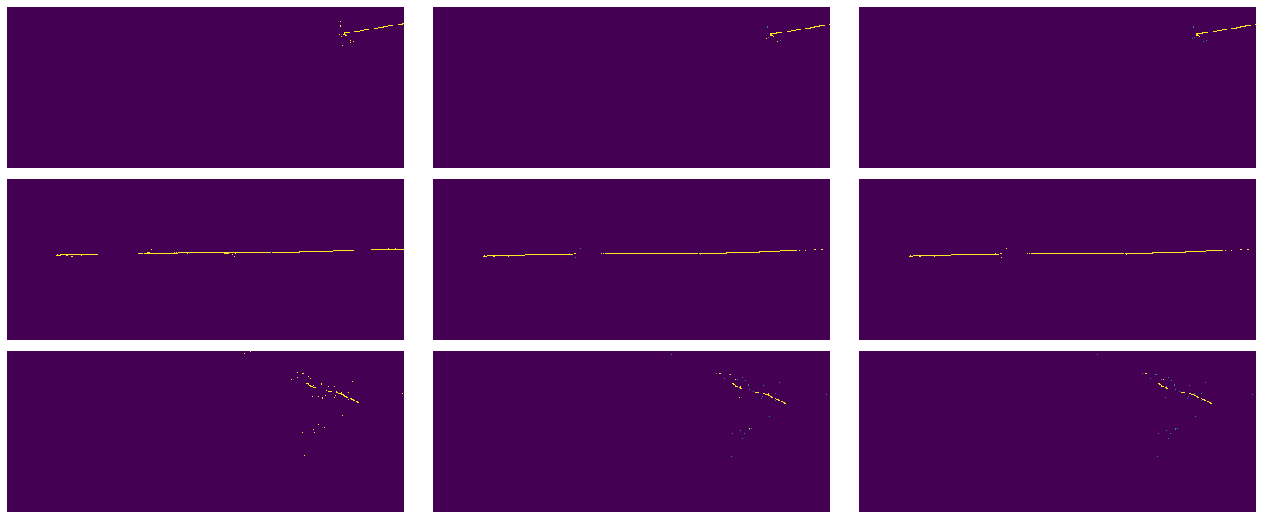

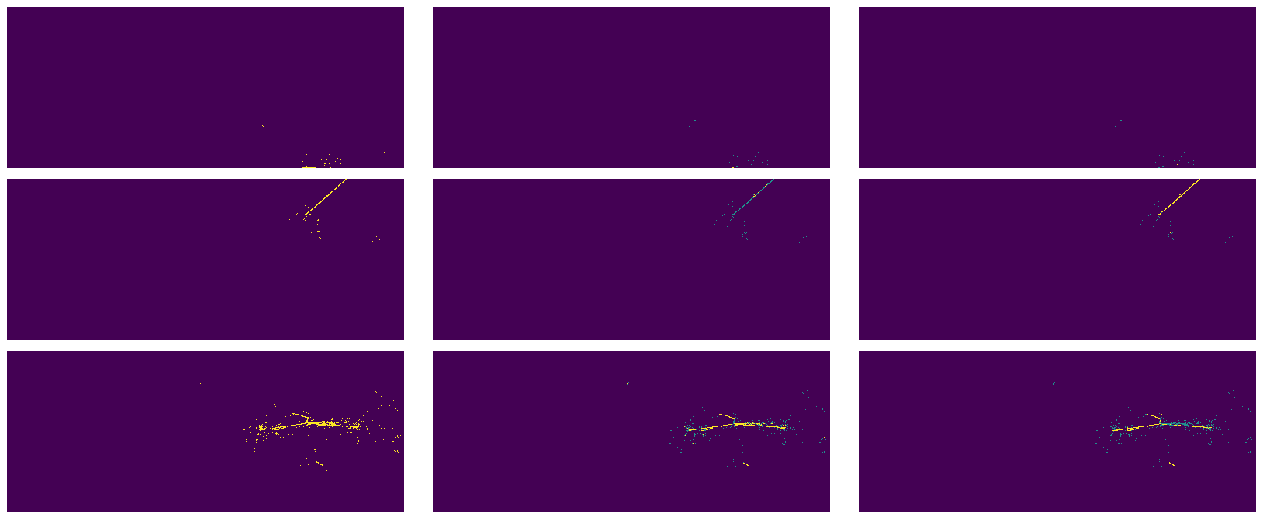

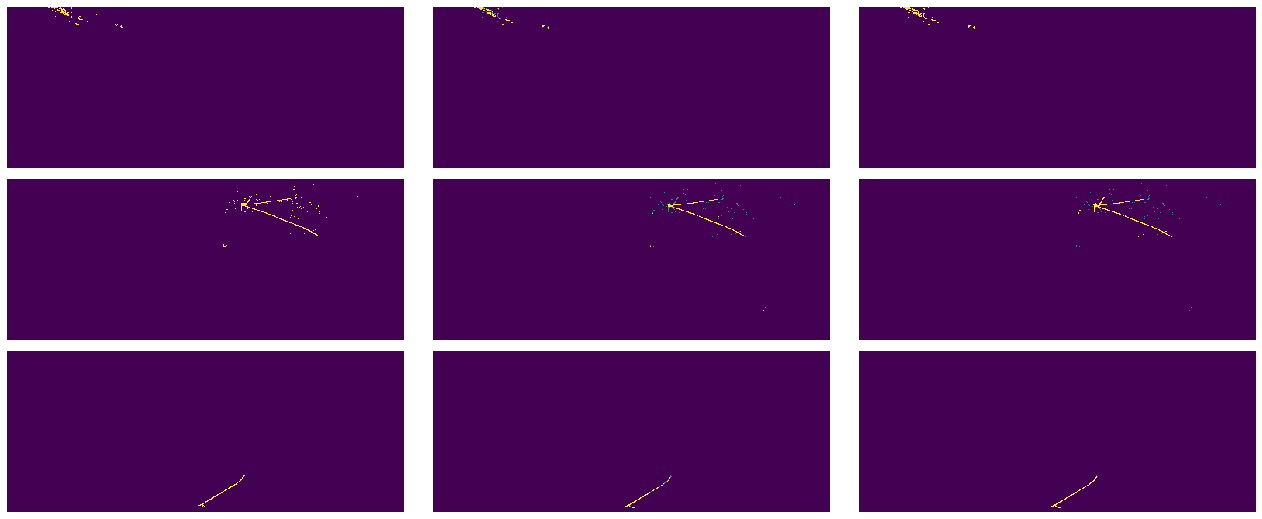

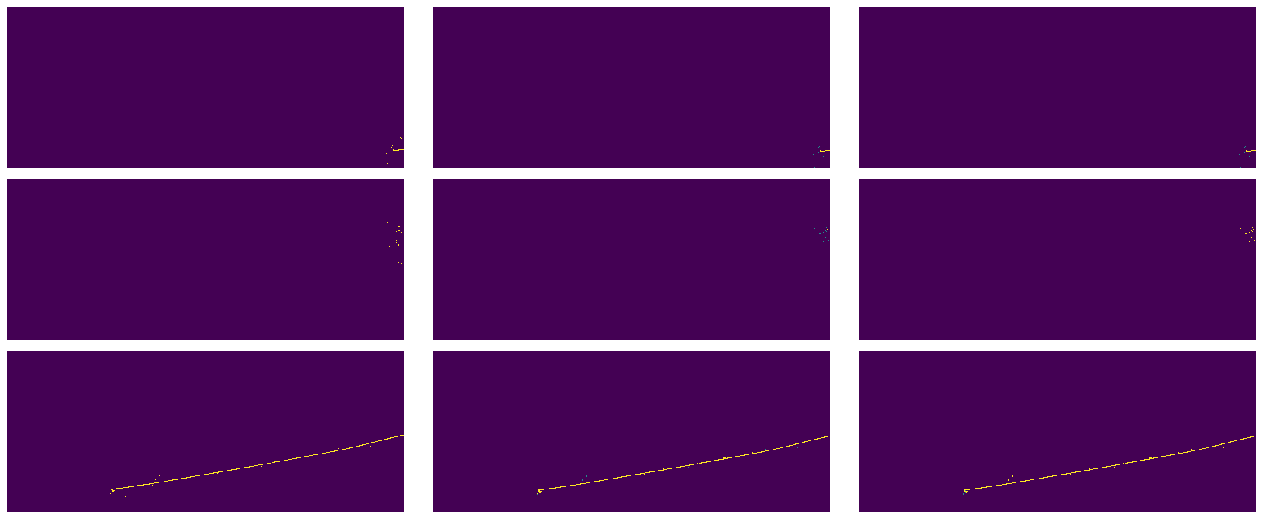

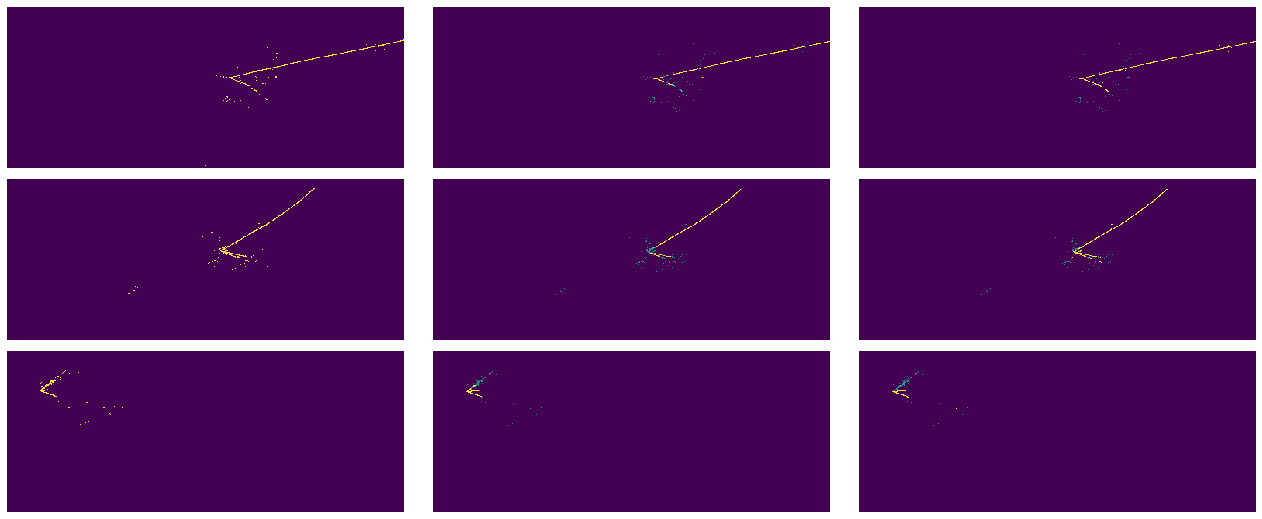

In [29]:
# Run
train_loss_epochs = []
train_acc_epochs = []
val_loss_epochs = []
val_acc_epochs = []
for epoch in list(range(5)):
    # Training
    model.train()
    optim.zero_grad()
    train_dl = bunch.train_dl
    losses = np.zeros(len(train_dl))
    accuracies = np.zeros(len(train_dl))
    for i, batch in enumerate(train_dl):
        images, masks = batch
        x = Variable(images)
        y = Variable(masks)
        pred = model.forward(x)

        loss = loss_fn(pred, y)
        losses[i] = loss.item()

        acc = accuracy(pred, y)
        accuracies[i] = acc

        if i == (len(train_dl) - 1):
            net_input = x.detach().numpy()
            net_pred = pred.detach().numpy()
            net_mask = y.detach().numpy()
            iu.show_batch(epoch, i, net_input, net_pred, net_mask, void_code)

        loss.backward()
        optim.step()
    train_loss_epochs.append(losses.mean())
    train_acc_epochs.append(accuracies.mean())
    # Validation
    model.eval()
    valid_dl = bunch.valid_dl
    val_losses = np.zeros(len(valid_dl))
    val_accuracies = np.zeros(len(valid_dl))
    with torch.no_grad():
        for i, batch in enumerate(valid_dl):
            images, masks = batch
            x = Variable(images)
            y = Variable(masks)
            pred = model.forward(x)
            loss = loss_fn(pred, y)
            val_losses[i] = loss.item()

            acc = accuracy(pred, y)
            val_accuracies[i] = acc
    val_loss_epochs.append(val_losses.mean())
    val_acc_epochs.append(val_accuracies.mean())
    print("Epoch {} : loss {} acc {}   val_loss {} val_acc {}:".format(
        epoch + 1, losses.mean(), accuracies.mean(),
        val_losses.mean(), val_accuracies.mean()))

In [30]:
!ls -l *.png

-rw-r--r-- 1 root root 5680 Nov 21 13:00 diagnostic_0_16.png
-rw-r--r-- 1 root root 8484 Nov 21 12:36 diagnostic_0_1.png
-rw-r--r-- 1 root root 7782 Nov 21 13:10 diagnostic_1_16.png
-rw-r--r-- 1 root root 6817 Nov 21 13:20 diagnostic_2_16.png
-rw-r--r-- 1 root root 5445 Nov 21 13:30 diagnostic_3_16.png
-rw-r--r-- 1 root root 7847 Nov 21 13:40 diagnostic_4_16.png


In [0]:
files.download("diagnostic_0_16.png")
files.download("diagnostic_1_16.png")
files.download("diagnostic_2_16.png")
files.download("diagnostic_3_16.png")
files.download("diagnostic_4_16.png")

In [0]:
def pretty_size(size):
	"""Pretty prints a torch.Size object"""
	assert(isinstance(size, torch.Size))
	return " × ".join(map(str, size))

def dump_tensors(gpu_only=True):
	"""Prints a list of the Tensors being tracked by the garbage collector."""
	import gc
	total_size = 0
	for obj in gc.get_objects():
		try:
			if torch.is_tensor(obj):
				if not gpu_only or obj.is_cuda:
					print("%s:%s%s %s" % (type(obj).__name__, 
										  " GPU" if obj.is_cuda else "",
										  " pinned" if obj.is_pinned else "",
										  pretty_size(obj.size())))
					total_size += obj.numel()
			elif hasattr(obj, "data") and torch.is_tensor(obj.data):
				if not gpu_only or obj.is_cuda:
					print("%s → %s:%s%s%s%s %s" % (type(obj).__name__, 
												   type(obj.data).__name__, 
												   " GPU" if obj.is_cuda else "",
												   " pinned" if obj.data.is_pinned else "",
												   " grad" if obj.requires_grad else "", 
												   " volatile" if obj.volatile else "",
												   pretty_size(obj.data.size())))
					total_size += obj.data.numel()
		except Exception as e:
			pass        
	print("Total size:", total_size)

In [0]:
dump_tensors()

Total size: 0


/usr/local/lib/python3.6/dist-packages/torch/distributed/distributed_c10d.py:101: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  warnings.warn("torch.distributed.reduce_op is deprecated, please use "
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: MODES has been renamed to Modes and will be removed in a future version of pywt.


In [0]:
#del x, y
#del images, masks
#del model
torch.cuda.empty_cache()

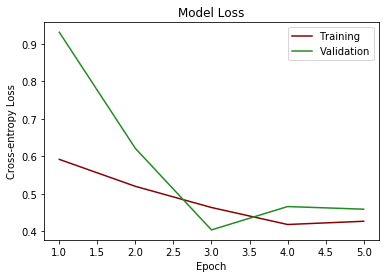

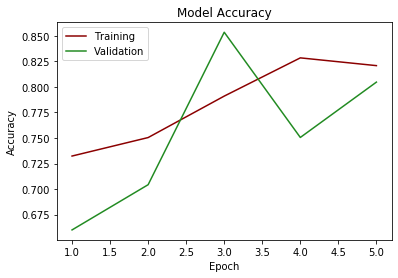

In [34]:
epoch_list = list(range(1, 6))
fig, ax = plt.subplots()
ax.set_title('Model Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Cross-entropy Loss')
ax.plot(epoch_list, train_loss_epochs, label='Training', c='darkred')
ax.plot(epoch_list, val_loss_epochs, label='Validation', c='forestgreen')
ax.legend(loc='upper right')
plt.savefig('AverageLossVsTrainingEpoch')

fig, ax = plt.subplots()
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.plot(epoch_list, train_acc_epochs, label='Training', c='darkred')
ax.plot(epoch_list, val_acc_epochs, label='Validation', c='forestgreen')
ax.legend(loc='upper left')
plt.savefig('AverageAccuracyVsTrainingEpoch')

In [0]:
files.download("AverageAccuracyVsTrainingEpoch.png")
files.download("AverageLossVsTrainingEpoch.png")

In [0]:
!ls -l

total 1736
-rw-r--r-- 1 root   root    22490 Nov 14 13:22  AverageAccuracyVsTrainingEpoch.png
-rw-r--r-- 1 root   root    19800 Nov 14 13:22  AverageLossVsTrainingEpoch.png
-rw-r--r-- 1 root   root     3416 Nov 14 12:29 'data (1).py'
-rw-r--r-- 1 root   root     3416 Nov 14 12:12  data.py
drwxr-xr-x 4 197608 197121   4096 Nov 14 08:36  Images
drwxr-xr-x 2 root   root     4096 Nov 14 12:12  __pycache__
drwxr-xr-x 1 root   root     4096 Nov  6 16:17  sample_data
-rw-r--r-- 1 root   root   840513 Nov 14 12:29 'track_shower_images.tar (1).gz'
-rw-r--r-- 1 root   root   840513 Nov 14 12:12  track_shower_images.tar.gz
-rw-r--r-- 1 root   root     1264 Nov 14 12:29 'transforms (1).py'
-rw-r--r-- 1 root   root     1264 Nov 14 12:12  transforms.py
-rw-r--r-- 1 root   root     4289 Nov 14 12:29 'unet (1).py'
-rw-r--r-- 1 root   root     4289 Nov 14 12:12  unet.py
